<a href="https://colab.research.google.com/github/SanyaKapoor/mnist-ann-classifier-fgsm/blob/main/mnist_ann_classifier_fgsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7904 sha256=a2b7a1853e9c1ad6a9eab8bd4952327d0d90f17851d0a9af0c5bff8d3fcc0669
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [4]:
from google.colab import files
uploaded = files.upload()

Saving t10k-labels.idx1-ubyte to t10k-labels.idx1-ubyte
Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte
Saving train-labels.idx1-ubyte to train-labels.idx1-ubyte
Saving train-images.idx3-ubyte to train-images.idx3-ubyte


In [7]:
import idx2numpy
import numpy as np

# Read training images
with open('train-images.idx3-ubyte', 'rb') as f:
    train_images = idx2numpy.convert_from_file(f)

# Read training labels
with open('train-labels.idx1-ubyte', 'rb') as f:
    train_labels = idx2numpy.convert_from_file(f)

# Read testing images
with open('t10k-images.idx3-ubyte', 'rb') as f:
    test_images = idx2numpy.convert_from_file(f)

# Read testing labels
with open('t10k-labels.idx1-ubyte', 'rb') as f:
    test_labels = idx2numpy.convert_from_file(f)

# Convert numpy arrays to pandas DataFrames
import pandas as pd

train_images_df = pd.DataFrame(train_images.reshape(train_images.shape[0], -1))
train_labels_df = pd.DataFrame(train_labels, columns=['label'])
test_images_df = pd.DataFrame(test_images.reshape(test_images.shape[0], -1))
test_labels_df = pd.DataFrame(test_labels, columns=['label'])

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 9912422/9912422 [00:00<00:00, 11419335.62it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 363632.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 1648877/1648877 [00:00<00:00, 3121970.19it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



100%|██████████| 4542/4542 [00:00<00:00, 2985976.30it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Training Loss: 0.4358, Validation Loss: 0.2366, Validation Accuracy: 92.72%
Epoch 2/10, Training Loss: 0.2088, Validation Loss: 0.1721, Validation Accuracy: 94.58%
Epoch 3/10, Training Loss: 0.1501, Validation Loss: 0.1360, Validation Accuracy: 95.98%
Epoch 4/10, Training Loss: 0.1220, Validation Loss: 0.1315, Validation Accuracy: 96.01%
Epoch 5/10, Training Loss: 0.1040, Validation Loss: 0.1291, Validation Accuracy: 96.05%
Epoch 6/10, Training Loss: 0.0893, Validation Loss: 0.1107, Validation Accuracy: 96.51%
Epoch 7/10, Training Loss: 0.0778, Validation Loss: 0.1015, Validation Accuracy: 97.02%
Epoch 8/10, Training Loss: 0.0716, Validation Loss: 0.1214, Validation Accuracy: 96.23%
Epoch 9/10, Training Loss: 0.0637, Validation Loss: 0.1033, Validation Accuracy: 96.88%
Epoch 10/10, Training Loss: 0.0583, Validation Loss: 0.1367, Validation Accuracy: 96.07%


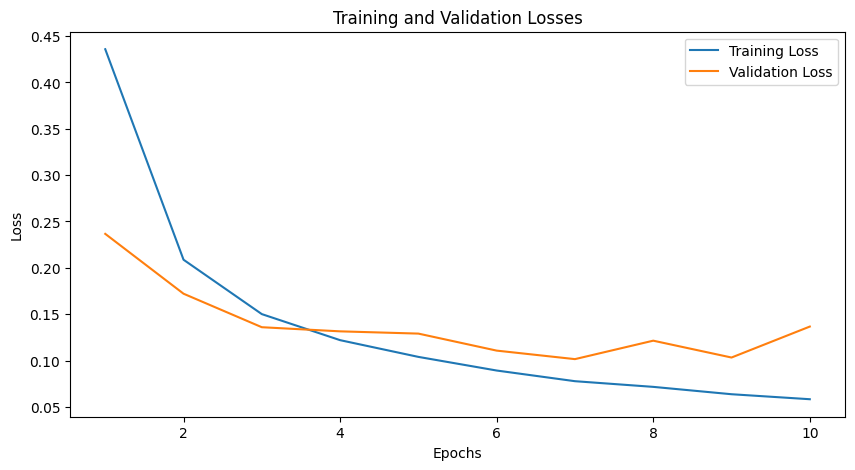

Test Accuracy: 96.17%


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Define the model architecture
class ANNClassifier(nn.Module):
    def __init__(self):
        super(ANNClassifier, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define training parameters
batch_size = 64
learning_rate = 0.001
epochs = 10

# Load MNIST dataset and split into training and validation sets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = ANNClassifier()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
train_losses = []
val_losses = []
for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item() * data.size(0)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    val_loss /= len(val_loader.dataset)
    val_losses.append(val_loss)

    print(f'Epoch {epoch+1}/{epochs}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {(100 * correct / total):.2f}%')

# Plot the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

# Evaluate the model on test data
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

# Save the trained model
torch.save(model.state_dict(), 'model.pth')

Epoch 1/10, Training Loss: 0.4134, Validation Loss: 0.2289, Validation Accuracy: 93.12%
Epoch 2/10, Training Loss: 0.2065, Validation Loss: 0.1571, Validation Accuracy: 95.15%
Epoch 3/10, Training Loss: 0.1508, Validation Loss: 0.1159, Validation Accuracy: 96.45%
Epoch 4/10, Training Loss: 0.1227, Validation Loss: 0.0932, Validation Accuracy: 97.17%
Epoch 5/10, Training Loss: 0.1055, Validation Loss: 0.0890, Validation Accuracy: 97.38%
Epoch 6/10, Training Loss: 0.0891, Validation Loss: 0.0740, Validation Accuracy: 97.65%
Epoch 7/10, Training Loss: 0.0817, Validation Loss: 0.0607, Validation Accuracy: 98.03%
Epoch 8/10, Training Loss: 0.0719, Validation Loss: 0.0576, Validation Accuracy: 98.13%
Epoch 9/10, Training Loss: 0.0666, Validation Loss: 0.0637, Validation Accuracy: 97.75%
Epoch 10/10, Training Loss: 0.0621, Validation Loss: 0.0519, Validation Accuracy: 98.23%


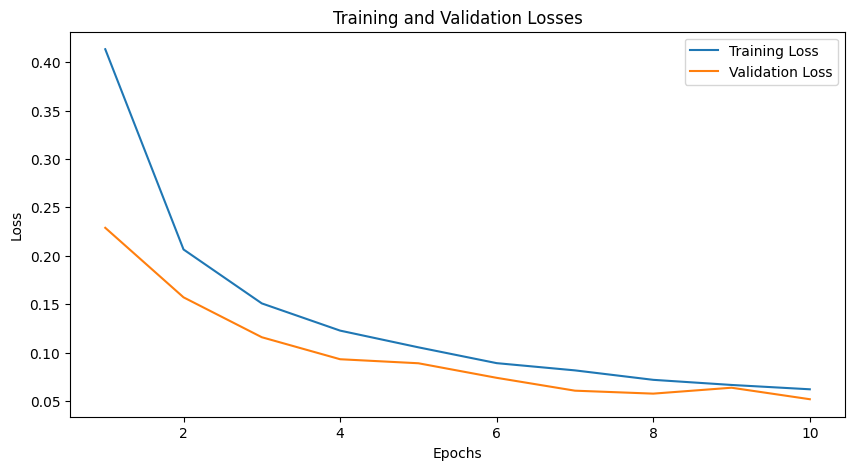

Test Accuracy: 97.01%


In [9]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from typing import Tuple

class ANNClassifier(nn.Module):
    def __init__(self, train_params: dict):
        super(ANNClassifier, self).__init__()
        self.train_params = train_params
        self._define_model()
        self.criterion = self._define_criterion()
        self.optimizer = self._define_optimizer()

    def _define_model(self) -> None:
        """
        Define the model architecture
        return: None
        """
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def _define_criterion(self) -> nn.Module:
        """
        Define the criterion (loss function) to use for the model
        return: nn.Module
        """
        return nn.CrossEntropyLoss()

    def _define_optimizer(self) -> torch.optim.Optimizer:
        """
        Define the optimizer to use for the model
        return: torch.optim.Optimizer
        """
        return torch.optim.Adam(self.parameters(), lr=self.train_params['learning_rate'])

    def get_dataloaders(self) -> Tuple[DataLoader, DataLoader]:
        """
        Create the dataloaders(train and test) for the MNIST dataset
        return: DataLoader, DataLoader
        """
        # Load MNIST dataset and split into training and testing sets
        transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
        train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
        test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

        train_loader = DataLoader(train_dataset, batch_size=self.train_params['batch_size'], shuffle=True)
        test_loader = DataLoader(test_dataset, batch_size=self.train_params['batch_size'], shuffle=False)

        return train_loader, test_loader

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def train_step(self):
        """
        Train and save the model
        return: None
        """
        # Training loop
        train_losses = []
        val_losses = []
        for epoch in range(self.train_params['epochs']):
            self.train()
            train_loss = 0.0
            for data, target in self.train_loader:
                self.optimizer.zero_grad()
                output = self(data)
                loss = self.criterion(output, target)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item() * data.size(0)
            train_loss /= len(self.train_loader.dataset)
            train_losses.append(train_loss)

            self.eval()
            val_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad():
                for data, target in self.val_loader:
                    output = self(data)
                    loss = self.criterion(output, target)
                    val_loss += loss.item() * data.size(0)
                    _, predicted = torch.max(output.data, 1)
                    total += target.size(0)
                    correct += (predicted == target).sum().item()
            val_loss /= len(self.val_loader.dataset)
            val_losses.append(val_loss)

            print(f'Epoch {epoch+1}/{self.train_params["epochs"]}, Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}, Validation Accuracy: {(100 * correct / total):.2f}%')

        return {'train_losses': train_losses, 'val_losses': val_losses}

    def infer(self):
        """
        Evaluate the model
        return: float
        """
        self.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for data, target in self.test_loader:
                output = self(data)
                _, predicted = torch.max(output.data, 1)
                total += target.size(0)
                correct += (predicted == target).sum().item()

        test_accuracy = 100 * correct / total
        return test_accuracy

    def plot_loss(self, results: dict) -> None:
        """
        Plot the curve loss v/s epochs
        results: dict
        return: None
        """
        train_losses = results['train_losses']
        val_losses = results['val_losses']

        plt.figure(figsize=(10, 5))
        plt.plot(range(1, self.train_params['epochs']+1), train_losses, label='Training Loss')
        plt.plot(range(1, self.train_params['epochs']+1), val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Losses')
        plt.legend()
        plt.show()

    def save(self, file_path: str):
        """
        Save the model
        file_path: str
        return: None
        """
        torch.save(self.state_dict(), file_path)


if __name__ == '__main__':
    train_params = {
        "batch_size": 64,
        "learning_rate": 0.001,
        "epochs": 10
    }

    # Create the model
    model = ANNClassifier(train_params)

    # Load the data
    train_loader, test_loader = model.get_dataloaders()
    model.train_loader = train_loader
    model.val_loader = val_loader
    model.test_loader = test_loader

    # Train the model and return everything you need to report
    # and plot using a dictionary
    results = model.train_step()

    # Plot the loss curve
    model.plot_loss(results)

    # Save the model
    model.save(file_path='model.pth')

    # Evaluate the model
    test_accuracy = model.infer()
    print(f'Test Accuracy: {test_accuracy:.2f}%')

In [11]:
!pip install model

ERROR: Could not find a version that satisfies the requirement model (from versions: none)
ERROR: No matching distribution found for model


Evasion Rate: 0.4686


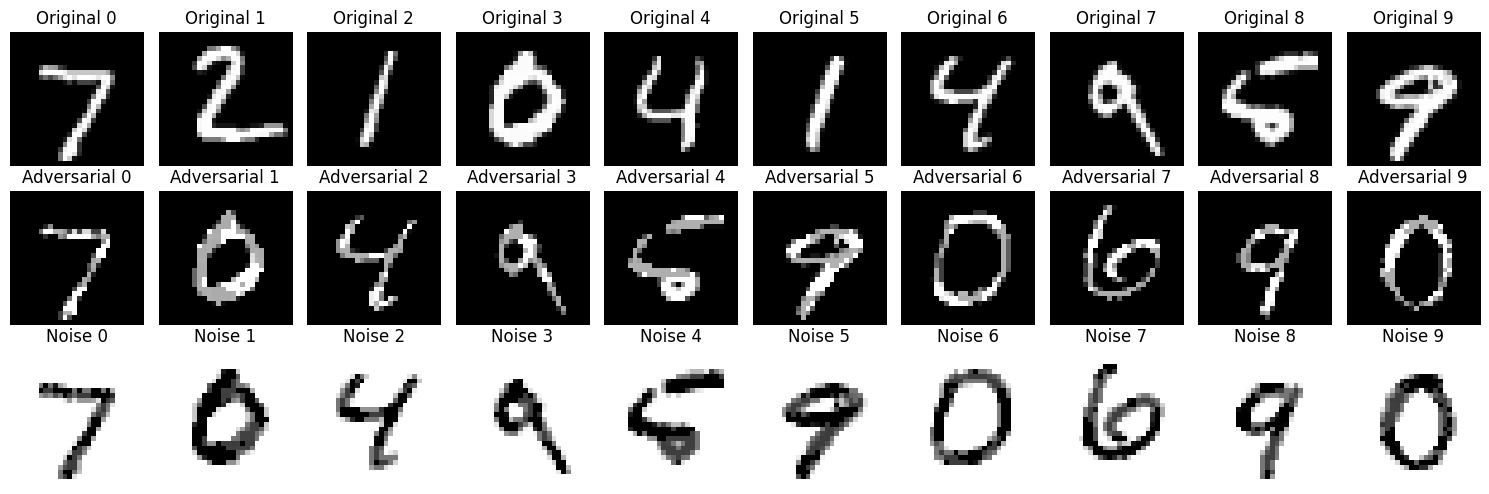

Random Digit: 5, Perturbed Prediction: 1


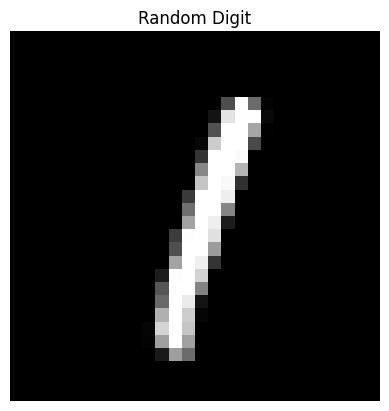

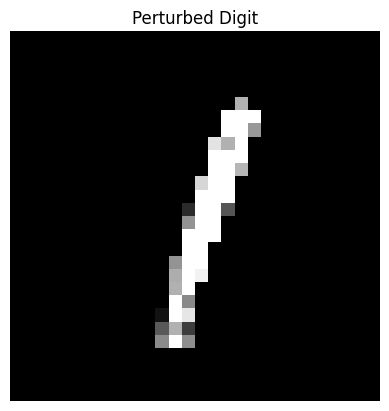

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

class FGSM:
    def __init__(self, model, criterion, test_loader, epsilon=0.3):
        self.model = model
        self.criterion = criterion
        self.test_loader = test_loader
        self.epsilon = epsilon

    def apply(self):
        """
        Perform the Fast Gradient Sign Method attack on the model and return the results.
        The result should be such that it contains evasion rate, adversarial examples, and
        all necessary information to plot and answer the questions.
        return: dict
        """
        self.model.eval()
        correct = 0
        total = 0
        misclassified = 0
        adversarial_examples = []
        adversarial_noises = []

        for data, target in self.test_loader:
            data.requires_grad = True
            output = self.model(data)
            init_pred = output.max(1, keepdim=True)[1]

            if init_pred.item() != target.item():
                continue

            loss = self.criterion(output, target)
            self.model.zero_grad()
            loss.backward()
            data_grad = data.grad.data

            perturbed_data = self.fgsm_attack(data, self.epsilon, data_grad)
            output = self.model(perturbed_data)
            final_pred = output.max(1, keepdim=True)[1]

            if final_pred.item() != target.item():
                misclassified += 1
                adversarial_examples.append(perturbed_data.squeeze().detach().cpu().numpy())
                adversarial_noises.append((perturbed_data - data).squeeze().detach().cpu().numpy())

            total += 1
            correct += final_pred.eq(target.view_as(final_pred)).sum().item()

        evasion_rate = misclassified / total if total > 0 else 0

        return {
            "evasion_rate": evasion_rate,
            "adv_examples": adversarial_examples,
            "adv_noises": adversarial_noises
        }

    def fgsm_attack(self, image, epsilon, data_grad):
        sign_data_grad = data_grad.sign()
        perturbed_image = image + epsilon * sign_data_grad
        perturbed_image = torch.clamp(perturbed_image, 0, 1)
        return perturbed_image


if __name__ == "__main__":
    # Load the trained model
    train_params = {
        "batch_size": 64,
        "learning_rate": 0.001,
        "epochs": 10
    }

    model = ANNClassifier(train_params)
    model.load_state_dict(torch.load('model.pth'))

    # Load the test data
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

    # Attack parameters
    attack_params = {
        "epsilon": 0.3
    }

    # Perform the FGSM attack
    fgsm_attack = FGSM(model, nn.CrossEntropyLoss(), test_loader, epsilon=attack_params["epsilon"])
    results = fgsm_attack.apply()

    # Question 1: Evasion Rate
    print(f'Evasion Rate: {results["evasion_rate"]:.4f}')

    # Question 2: Plotting original images, adversarial examples, and adversarial noises
    num_digits = 10
    fig, axes = plt.subplots(3, num_digits, figsize=(15, 5))
    original_images = []
    adversarial_examples = []
    adversarial_noises = []
    for i in range(num_digits):
        original_images.append(test_dataset[i][0].numpy().squeeze())
        adversarial_examples.append(results["adv_examples"][i].squeeze())
        adversarial_noises.append(results["adv_noises"][i].squeeze())

    for i in range(num_digits):
        axes[0, i].imshow(original_images[i], cmap='gray')
        axes[0, i].set_title(f'Original {i}')
        axes[0, i].axis('off')

        axes[1, i].imshow(adversarial_examples[i], cmap='gray')
        axes[1, i].set_title(f'Adversarial {i}')
        axes[1, i].axis('off')

        axes[2, i].imshow(adversarial_noises[i], cmap='gray')
        axes[2, i].set_title(f'Noise {i}')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

    # Question 3: Most misclassified digit
    # Randomly pick one digit from the ten digits
    random_digit_index = np.random.randint(0, 10)
    random_digit = test_dataset[random_digit_index][0].unsqueeze(0)
    random_target = torch.tensor([random_digit_index])

    output = model(random_digit)
    _, predicted = torch.max(output.data, 1)

    # Generate adversarial example for the random digit
    random_digit.requires_grad = True
    output = model(random_digit)
    loss = nn.CrossEntropyLoss()(output, random_target)
    model.zero_grad()
    loss.backward()
    data_grad = random_digit.grad.data
    perturbed_digit = fgsm_attack.fgsm_attack(random_digit, attack_params["epsilon"], data_grad)

    perturbed_output = model(perturbed_digit)
    _, perturbed_predicted = torch.max(perturbed_output.data, 1)

    print(f'Random Digit: {random_digit_index}, Perturbed Prediction: {perturbed_predicted.item()}')

    # Report structural similarity
    # (You may need additional analysis here based on your observations)
    plt.imshow(random_digit.squeeze().detach().cpu().numpy(), cmap='gray')
    plt.title('Random Digit')
    plt.axis('off')
    plt.show()

    plt.imshow(perturbed_digit.squeeze().detach().cpu().numpy(), cmap='gray')
    plt.title('Perturbed Digit')
    plt.axis('off')
    plt.show()